In [2]:
!pip install --upgrade tensorflow-io
import tensorflow as tf
import tensorflow_io as tfio
tf.__version__

'2.12.0'

In [10]:
#subd='/kaggle/working/alt_sources_3/val/X'
#os.makedirs(subd,exist_ok=True)
#!rm -r alt_sources_test_disks/val

In [3]:
import pandas as pd,numpy as np,os,plotly.graph_objects as go,tensorflow as tf
from tensorflow import keras
from plotly.subplots import make_subplots
from scipy.ndimage import zoom

In [22]:
#create undersampled AltRowCol dataset
meas=pd.read_csv('/kaggle/input/grid-measurements-source-detector/measurement_list.csv')

In [27]:

for file in os.listdir('/kaggle/input/zscores/train/X/'):
    temp=np.load('/kaggle/input/zscores/train/X/'+file)
    meas['amp']=temp[:576]
    meas['phase']=temp[576:]
    Allch_amp_phase=meas[(meas['grid_pos_1']%3==1) & (meas['grid_pos_2']%3==1)] 
    temp=pd.concat([Allch_amp_phase['amp'],Allch_amp_phase['phase']],ignore_index=True)
    temp=np.array(temp.values)
    np.save('/kaggle/working/alt_sources_3/train/X/'+file,temp)

for file in os.listdir('/kaggle/input/zscores/val/X/'):
    temp=np.load('/kaggle/input/zscores/val/X/'+file)
    meas['amp']=temp[:576]
    meas['phase']=temp[576:]
    Allch_amp_phase=meas[(meas['grid_pos_1']%3==1) &  (meas['grid_pos_2']%3==1)] 
    temp=pd.concat([Allch_amp_phase['amp'],Allch_amp_phase['phase']],ignore_index=True)
    temp=np.array(temp.values)
    np.save('/kaggle/working/alt_sources_3/val/X/'+file,temp)


In [28]:
Allch_amp_phase

,Src,Det,NN,grid_pos_1,grid_pos_2,amp,phase
0,1,1,1,1,1,0.438472,-0.501201
1,1,2,2,1,1,0.455361,-0.517020
2,1,3,3,1,1,0.207006,-0.401747
9,4,10,1,1,4,0.467841,-0.378264
10,4,11,2,1,4,0.503549,-0.511895
...,...,...,...,...,...,...,...
469,157,470,2,10,13,0.501169,-0.416492
470,157,471,3,10,13,0.492890,-0.327767
477,160,478,1,10,16,0.451472,-0.462128
478,160,479,2,10,16,0.457751,-0.478485


In [30]:
#!zip -r alt_sources_3.zip /kaggle/working/alt_sources_3
#from IPython.display import FileLink
#FileLink('alt_sources_3.zip')


In [ ]:
'''
#creating the source-detector positions matrix
meas=np.zeros((36,16), dtype=int)
start_value=[1,2,3]
col_factor=3
row_factor=48
meas[:3,0]=start_value
for i in range(3,36):
    meas[i,0]=meas[(i-3),0]+row_factor
for i in range(1,16):
    meas[:,i]=meas[:,i-1]+col_factor
meas.shape

#full grid
input_ampph=np.load('/kaggle/input/zscores/train/X/1.npy')
meas_amp=np.zeros((36,16),dtype=float)
for i in range(0,16):
    for j in range(0,36):
        index=meas[j,i]-1
        index=index.astype(int)
        meas_amp[j,i]=input_ampph[index]
meas_amp.shape
meas_ph=np.zeros((36,16),dtype=float)
for i in range(0,16):
    for j in range(0,36):
        index=meas[j,i]-1
        index=index.astype(int)
        meas_ph[j,i]=input_ampph[index+576]
meas_ph.shape
'''

In [33]:
x_train=[];y_train=[];w_train=[];x_val=[];y_val=[];w_val=[]
for file in np.sort(os.listdir('/kaggle/input/alt-sources-3/train/train/X/')):
    temp=np.load('/kaggle/input/alt-sources-3/train/train/X/'+file)
    x_train.append(temp)

for file in np.sort(os.listdir('/kaggle/input/zscores/train/Y/')):
    temp=np.load('/kaggle/input/zscores/train/Y/'+file)
    temp32=zoom(temp,[2,2,2]+[1],mode='reflect',order=1).astype('float32')
    y_train.append(temp32)

for file in np.sort(os.listdir('/kaggle/input/zscores/train/W/')):
    temp=np.load('/kaggle/input/zscores/train/W/'+file)
    temp32=zoom(temp,[2,2,2]+[1],mode='reflect',order=1).astype('float32')
    w_train.append(temp32)

for file in np.sort(os.listdir('/kaggle/input/alt-sources-3/val/val/X/')):
    temp=np.load('/kaggle/input/alt-sources-3/val/val/X/'+file)
    x_val.append(temp)

for file in np.sort(os.listdir('/kaggle/input/zscores/val/Y/')):
    temp=np.load('/kaggle/input/zscores/val/Y/'+file)
    temp32=zoom(temp,[2,2,2]+[1],mode='reflect',order=1).astype('float32')
    y_val.append(temp32)

for file in np.sort(os.listdir('/kaggle/input/zscores/val/W/')):
    temp=np.load('/kaggle/input/zscores/val/W/'+file)
    temp32=zoom(temp,[2,2,2]+[1],mode='reflect',order=1).astype('float32')
    w_val.append(temp32)


In [37]:
x_train[0].shape

(144,)

In [54]:
'''
for file in os.listdir('/kaggle/input/zscores/train/X/'):
    temp=np.load('/kaggle/input/zscores/train/X/'+file)
    meas['amp']=temp[:576]
    meas['phase']=temp[576:]
    Allch_amp_phase=meas[(meas['grid_pos_1']%2!=0) & (meas['grid_pos_2']%2!=0)] 
    temp=pd.concat([Allch_amp_phase['amp'],Allch_amp_phase['phase']],ignore_index=True)
    temp=np.array(temp.values)
    np.save('/kaggle/working/alt_sources/train/X/'+file+'.npy',temp)
'''

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Concatenate, MaxPooling3D, UpSampling3D, Multiply, Dropout, ZeroPadding2D, Flatten, Conv2D, Conv3D, Conv2DTranspose, Conv3DTranspose, BatchNormalization, Activation, Reshape, Concatenate, Dense
from tensorflow.keras.optimizers import Adamax, RMSprop
import numpy as np


def weighted_mse(y_true, y_pred, weights):
    sq_errors = tf.math.square(y_pred-y_true)
    weighted_sq_errors = sq_errors*weights
    return weighted_sq_errors


def fdnet(input_shape, output_shape, n_filters=64, kernel_size=5, fc_dropout=0.2, ac1='tanh', ac='relu', learning_rate=0.0001):

    input_meas = keras.Input(shape=input_shape)
    y_true = keras.Input(shape=output_shape)
    weights = keras.Input(shape=output_shape)

    x = Flatten()(input_meas)
    x = Dense(np.product(output_shape), activation=ac1)(x)
    x = Dropout(fc_dropout)(x)
    x = Reshape(output_shape)(x)

    x = Conv3D(filters=n_filters, kernel_size=kernel_size, activation=ac, padding='same')(x)
    x = MaxPooling3D((2,2,2))(x)
    x = Conv3D(filters=n_filters, kernel_size=kernel_size, activation=ac, padding='same')(x)
    x = Conv3DTranspose(n_filters, (2, 2, 2), strides=2, padding='same')(x)
    x = Conv3D(filters=n_filters, kernel_size=kernel_size, activation=ac, padding='same')(x)

    y_pred = Conv3D(filters=2, kernel_size=1, strides=1, padding='same', activation=ac)(x)

    model = keras.Model([input_meas, y_true, weights], y_pred)
    model.add_loss(weighted_mse(y_true, y_pred, weights))
    model.compile(optimizer=Adamax(learning_rate = learning_rate))


    final_model = keras.Model(input_meas, y_pred)

    return model, final_model


model_name='zscore_fdnet_undersampled144_32_alt_sources_Adamax'
model, final_model = fdnet(x_train[0].shape,y_train[0].shape)

history = model.fit([np.array(x_train),np.array(y_train),np.array(w_train)],None,
                    batch_size=64,verbose = 3,epochs=1000,
                    validation_data=[[np.array(x_val),np.array(y_val),np.array(w_val)],None],
                    callbacks = [EarlyStopping(monitor='val_loss',
                                mode='min',
                                restore_best_weights=True,
                                verbose=3,patience=60)])



model.save('/kaggle/working/'+model_name)
model.save('/kaggle/working/zscore_fdnet_undersampled144_32_alt_sources_Adamax.h5')
train_losses = history.history['loss']
val_losses = history.history['val_loss']
#vis_train_loss(history,title='losses',savename='/kaggle/working/models/training_losses')

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

In [7]:
#final_model.summary()

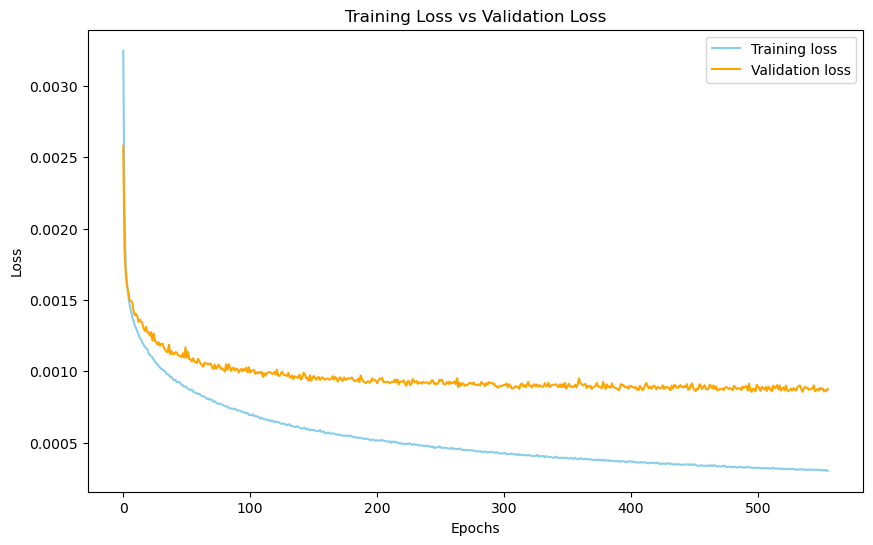

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(train_losses,label='Training loss',color='skyblue')
plt.plot(val_losses,label='Validation loss',color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.savefig('loss_plot_undersample32')
plt.show()

In [8]:
!cd /kaggle/working

In [13]:
!zip -r zscore_fdnet_undersampled32_alt_sources_Adamax.zip '/kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax'
from IPython.display import FileLink
FileLink('zscore_fdnet_undersampled32_alt_sources_Adamax.zip')

  adding: kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax/ (stored 0%)
  adding: kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax/variables/ (stored 0%)
  adding: kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax/variables/variables.index (deflated 66%)
  adding: kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax/keras_metadata.pb (deflated 92%)
  adding: kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax/fingerprint.pb (stored 0%)
  adding: kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax/assets/ (stored 0%)
  adding: kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax/saved_model.pb (deflated 89%)


/kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax.zip

In [23]:
for file in os.listdir('/kaggle/input/test-disks-zscores-x/X/'):
    temp=np.load('/kaggle/input/test-disks-zscores-x/X/'+file)
    meas['amp']=temp[:576]
    meas['phase']=temp[576:]
    Allch_amp_phase=meas[(meas['grid_pos_1']%2!=0) & (meas['grid_pos_2']%2!=0)] 
    temp=pd.concat([Allch_amp_phase['amp'],Allch_amp_phase['phase']],ignore_index=True)
    temp=np.array(temp.values)
    np.save('/kaggle/working/alt_sources_test_disks/X/'+file,temp)

In [ ]:
!zip -r alt_sources_test_disks.zip '/kaggle/working/alt_sources_test_disks'
from IPython.display import FileLink
FileLink('alt_sources_test_disks.zip')

In [3]:
import pickle
with open('/kaggle/input/zscores/factors.p', 'rb') as f:
    factor = pickle.load(f)
factors={}
factors['mean']=factor[0]
factors['std']=factor[1]
factors['mua_min']=factor[2]
factors['mua_range']=factor[3]
factors['mus_min']=factor[4]
factors['mus_range']=factor[5]
factors['dwn_factor']=factor[6]
factors['roi_factor']=factor[7]
factors

{'mean': array([ -9.76486598, -11.94126922, -13.68280513, ...,  22.52690221,
         36.74748799,  50.12313807]),
 'std': array([0.44787742, 0.63526332, 0.76196818, ..., 3.33164611, 5.36270396,
        7.41481909]),
 'mua_min': 0.004000351303254817,
 'mua_range': 0.031536837390914084,
 'mus_min': 0.5000241722787546,
 'mus_range': 2.492116532342978,
 'dwn_factor': [0.5, 0.5, 0.5],
 'roi_factor': 0.9066751953125}

In [5]:
loaded_model=tf.keras.models.load_model('/kaggle/input/models/zscore_fdnet_undersampled32_alt_sources_Adamax.h5')
final_model=keras.Model(loaded_model.input[0],loaded_model.output)

In [6]:
#temp=np.load('/kaggle/input/test-disks-zscores-x/alt_sources_test_disks/alt_sources_test_disks/alt_sources_test_disks/X/D10.npy')

In [ ]:
y_pred=final_model()

In [7]:
!pip install -U Kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.5 MB/s eta 0:00:0000:0100:01


In [8]:
import scipy.io, numpy as np,plotly.io as pio
from scipy.ndimage import zoom
from plotly.subplots import make_subplots
from skimage.metrics import structural_similarity as compare_ssim
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
from skimage.metrics import structural_similarity as compare_ssim

In [42]:
temp=np.load('/kaggle/input/zscores/val/val/Y/10.npy')
temp32=zoom(temp,[2,2,2]+[1],mode='reflect',order=1).astype('float32')
#temp32.shape
#y_pred=final_model.predict(temp.reshape(1,-1))

In [37]:
y_pred_reshaped=np.squeeze(y_pred,0)

In [43]:
X, Y, Z = np.mgrid[:32, :32, :16]

fig = go.Figure(data=go.Volume(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    value=temp32[:,:,:,0].flatten(),
    isomin=np.min(np.min(temp32[:,:,:,0]))+(0*np.min(np.min(temp32[:,:,:,1]))),
    isomax=np.max(np.max(temp32[:,:,:,0])),
    opacity=0.5,
    surface_count=6,
    ))
fig.update_layout(scene_xaxis_showticklabels=False,
                  scene_yaxis_showticklabels=False,
                  scene_zaxis_showticklabels=False)
fig.show()

In [24]:
import scipy.io, numpy as np,plotly.io as pio
from scipy.ndimage import zoom
from plotly.subplots import make_subplots
from skimage.metrics import structural_similarity as compare_ssim
import matplotlib.pyplot as plt

In [16]:
file_name='D15_1.npy'
depth=file_name.split('_')[0][1:]
temp=np.load('/kaggle/input/test-disks-zscores-x/alt_sources_test_disks/alt_sources_test_disks/X/'+file_name).reshape(1,-1)
y_pred=final_model.predict(temp)
y_pred_reshaped=np.squeeze(y_pred,0)
rescaled_y_pred_mua=(y_pred_reshaped[:,:,:,0]*factors['mua_range'])+factors['mua_min']
rescaled_y_pred_mus=(y_pred_reshaped[:,:,:,1]*factors['mus_range'])+factors['mus_min']

temp_dict=scipy.io.loadmat('/kaggle/input/test-disks/test_disks/'+file_name[:-4]+'.mat')
#Y=zoom(temp_dict['target'],factors['dwn_factor']+[1],mode='reflect',order=1).astype('float32')
temp_y_mua=temp_dict['target'][:,:,:,0]
temp_y_mus=temp_dict['target'][:,:,:,1]

data_range_mua=np.max([np.max(rescaled_y_pred_mua),np.max(temp_y_mua)])-np.min([np.min(rescaled_y_pred_mua),np.min(temp_y_mua)])
ssim_value_mua = compare_ssim(rescaled_y_pred_mua, temp_y_mua, channel_axis=-1,data_range=data_range_mua)
data_range_mus=np.max([np.max(rescaled_y_pred_mus),np.max(temp_y_mus)])-np.min([np.min(rescaled_y_pred_mus),np.min(temp_y_mus)])
ssim_value_mus = compare_ssim(rescaled_y_pred_mus, temp_y_mus, channel_axis=-1,data_range=data_range_mus)


'mua'
''
legend_coord=[[0.4,0.78],[0.98,0.78],[0.4,0.2],[0.98,0.2]]
X, Y, Z = np.mgrid[:32, :32, :16]

fig1 = go.Figure(data=go.Volume(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    value=rescaled_y_pred_mua.flatten(),
    isomin=np.min(np.min(rescaled_y_pred_mua))+(0*np.min(np.min(rescaled_y_pred_mua))),
    isomax=np.max(np.max(rescaled_y_pred_mua)),
    opacity=0.5,
    surface_count=6,
    colorbar=dict(len=0.4,x=legend_coord[0][0],y=legend_coord[0][1])
    ))
fig1.update_layout(scene_xaxis_showticklabels=False,
                  scene_yaxis_showticklabels=False,
                  scene_zaxis_showticklabels=False)
''
''
''
'Ground truth-mua'
''
X, Y, Z = np.mgrid[:32, :32, :16]

fig2 = go.Figure(data=go.Volume(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    value=temp_y_mua.flatten(),
    isomin=np.min(np.min(temp_y_mua))+(0*np.min(np.min(temp_y_mua))),
    isomax=np.max(np.max(temp_y_mua)),
    opacity=0.5,
    surface_count=6,
    colorbar=dict(len=0.4,x=legend_coord[1][0],y=legend_coord[1][1])
    ))
fig2.update_layout(scene_xaxis_showticklabels=False,
                  scene_yaxis_showticklabels=False,
                  scene_zaxis_showticklabels=False)
''
''
''
'mus'
''
X, Y, Z = np.mgrid[:32, :32, :16]

fig3 = go.Figure(data=go.Volume(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    value=rescaled_y_pred_mus.flatten(),
    isomin=np.min(np.min(rescaled_y_pred_mus))+(0*np.min(np.min(rescaled_y_pred_mus))),
    isomax=np.max(np.max(rescaled_y_pred_mus)),
    opacity=0.5,
    surface_count=6,
    colorbar=dict(len=0.4,x=legend_coord[2][0],y=legend_coord[2][1])
    ))
fig3.update_layout(scene_xaxis_showticklabels=False,
                  scene_yaxis_showticklabels=False,
                  scene_zaxis_showticklabels=False)
''
''
''
'Ground truth-mus'
''
X, Y, Z = np.mgrid[:32, :32, :16]

fig4 = go.Figure(data=go.Volume(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    value=temp_y_mus.flatten(),
    isomin=np.min(np.min(temp_y_mus))+(0*np.min(np.min(temp_y_mus))),
    isomax=np.max(np.max(temp_y_mus)),
    opacity=0.5,
    surface_count=6,
    colorbar=dict(len=0.4,x=legend_coord[3][0],y=legend_coord[3][1])
    ))
fig4.update_layout(scene_xaxis_showticklabels=False,
                  scene_yaxis_showticklabels=False,
                  scene_zaxis_showticklabels=False)
''
''
''
fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'scene'}, {'type': 'scene'}],[{'type': 'scene'},{'type': 'scene'}]])
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
for trace in fig3.data:
    fig.add_trace(trace, row=2, col=1)
for trace in fig4.data:
    fig.add_trace(trace, row=2, col=2)
fig.update_layout(title_text='Depth - '+depth+' mm',width=1000, height=800, annotations=[
        dict(text="Alternate source posistions-mua<br>SSIM: {:.6f}".format(ssim_value_mua), x=0.2, y=1, xref="paper", yref="paper", showarrow=False),
        dict(text="Ground truth-mua", x=0.8, y=1, xref="paper", yref="paper", showarrow=False),
        dict(text="Alternate source posistions-mus<br>SSIM: {:.6f}".format(ssim_value_mus), x=0.2, y=0.45, xref="paper", yref="paper", showarrow=False),
        dict(text="Ground truth-mus", x=0.8, y=0.45, xref="paper", yref="paper", showarrow=False)
    ])
pio.write_image(fig, "/kaggle/working/undersampled32_"+depth+".png",format="png")
pio.write_image(fig, "/kaggle/working/undersampled32_"+depth+".svg",format="svg")
fig.show()

1/1 [==============================] - 0s 244ms/step
